In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.metrics import mean_squared_error 

In [2]:
X_train = pd.read_csv('Train_Orig_OH.csv')
X_train = X_train.drop('LoanApproved' , axis=1)
y_train = X_train['RiskScore']
X_train = X_train.drop('RiskScore' , axis=1)
X_train.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStat_Widowed,HomeStat_Mortgage,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,57,47030,511,35,15823,24,2,404,0.363811,2,...,0,0,0,0,1,0,0,0,1,0
1,31,44704,587,6,42377,84,4,307,0.478811,2,...,0,1,0,0,0,0,1,0,0,0
2,40,86684,609,18,17768,36,4,513,0.159431,1,...,0,1,0,0,0,0,0,1,0,0
3,59,207724,666,36,19782,60,0,403,0.292295,2,...,0,1,0,0,0,1,0,0,0,0
4,32,54324,574,12,37298,48,1,541,0.187842,1,...,0,1,0,0,0,0,0,1,0,0


In [3]:
X_validation = pd.read_csv('Valid_Orig_OH.csv')
X_validation = X_validation.drop('LoanApproved' , axis=1)
y_validation = X_validation['RiskScore']
X_validation = X_validation.drop('RiskScore' , axis=1)
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4000 non-null   int64  
 1   AnnualIncome                    4000 non-null   int64  
 2   CreditScore                     4000 non-null   int64  
 3   Experience                      4000 non-null   int64  
 4   LoanAmount                      4000 non-null   int64  
 5   LoanDuration                    4000 non-null   int64  
 6   NumberOfDependents              4000 non-null   int64  
 7   MonthlyDebtPayments             4000 non-null   int64  
 8   CreditCardUtilizationRate       4000 non-null   float64
 9   NumberOfOpenCreditLines         4000 non-null   int64  
 10  NumberOfCreditInquiries         4000 non-null   int64  
 11  DebtToIncomeRatio               4000 non-null   float64
 12  BankruptcyHistory               40

In [4]:
X_test = pd.read_csv('Test_Orig_OH.csv')
X_test = X_test.drop('LoanApproved' , axis=1)
y_test = X_test['RiskScore']
X_test = X_test.drop('RiskScore' , axis=1)

In [5]:
y_validation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: RiskScore
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [10]:
class SingleLayer(nn.Module):
    def __init__(self,hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(49, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1)
        )
    def forward(self, x):
        return self.layers(x)

In [7]:
X_training = X_train.values
y_training = y_train.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_test.values
y_testing = y_test.values

In [8]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [11]:
print(X_training.shape)

(12000, 49)


Training Losses for hidden layer 8
             0
0  2628.783691
1  2626.951904
2  2625.132324
3  2623.355469
4  2621.626953
 RMSE for validation set is : 45.833404060078
 RMSE for test set is : 45.62162872818659
Training Losses for hidden layer 16
             0
0  2521.215332
1  2517.698242
2  2514.237061
3  2510.943604
4  2507.674561
 RMSE for validation set is : 38.277506194483855
 RMSE for test set is : 38.06283995127334
Training Losses for hidden layer 32
             0
0  2607.937500
1  2602.897217
2  2598.006836
3  2592.918945
4  2587.814941
 RMSE for validation set is : 30.789115032624558
 RMSE for test set is : 30.57116102195775
Training Losses for hidden layer 64
             0
0  2697.677002
1  2690.248047
2  2683.155762
3  2676.190918
4  2669.406738
 RMSE for validation set is : 18.755343476874714
 RMSE for test set is : 18.52260301657857
Training Losses for hidden layer 128
             0
0  2637.294189
1  2625.332764
2  2613.546875
3  2601.831543
4  2590.149414
 RMSE for

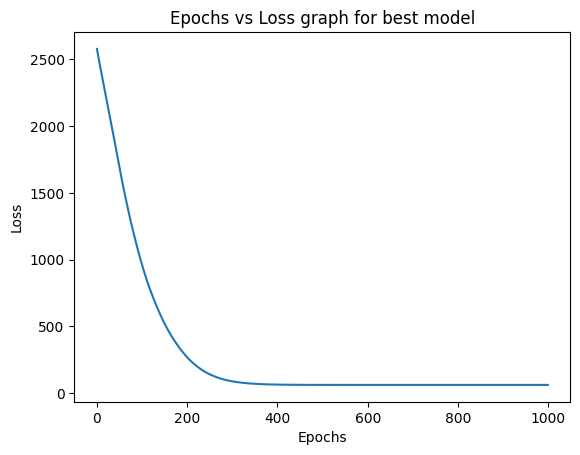

In [12]:
nuerons = [8,16,32,64,128,256]
min_err = 10000
again_loss = []
epochs = 1000
opt_degree = 0
for nueron in nuerons:
    model = SingleLayer(hidden1=nueron)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_arr = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        output = model(X_train)
        loss=criterion(y_train.float(), output)
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    print(f"Training Losses for hidden layer {nueron}")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val).detach().numpy()
    rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
    min_err = min(min_err,rmse)
    if rmse == min_err:
        again_loss = loss_arr
        opt_degree = nueron
    y_test_pred = model(X_test).detach().numpy()
    rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
    print(f" RMSE for validation set is : {rmse}")
    print(f" RMSE for test set is : {rmse_2}")
print(f"The Least Validation is {min_err} for Hidden Layer of Size {opt_degree}")
plt.plot(range(epochs), again_loss)
plt.title('Epochs vs Loss graph for best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()  
    
 

In [14]:
class DoubleLayer(nn.Module):
    def __init__(self, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(49, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
             0
0  2674.353516
1  2673.467773
2  2672.597656
3  2671.750244
4  2670.904785
 RMSE for validation set is : 43.050107637242036
 RMSE for test set is : 42.837045313278495
Training Losses for hidden layer 16
             0
0  2642.732666
1  2641.654785
2  2640.594238
3  2639.526855
4  2638.472412
 RMSE for validation set is : 34.56306156302382
 RMSE for test set is : 34.346054930047096
Training Losses for hidden layer 32
             0
0  2618.187012
1  2615.997803
2  2613.812256
3  2611.628174
4  2609.420410
 RMSE for validation set is : 20.986456727299082
 RMSE for test set is : 20.758782791586825
Training Losses for hidden layer 64
             0
0  2644.516113
1  2640.428223
2  2636.360352
3  2632.282471
4  2628.197266
 RMSE for validation set is : 9.090103939121017
 RMSE for test set is : 8.879428242327572


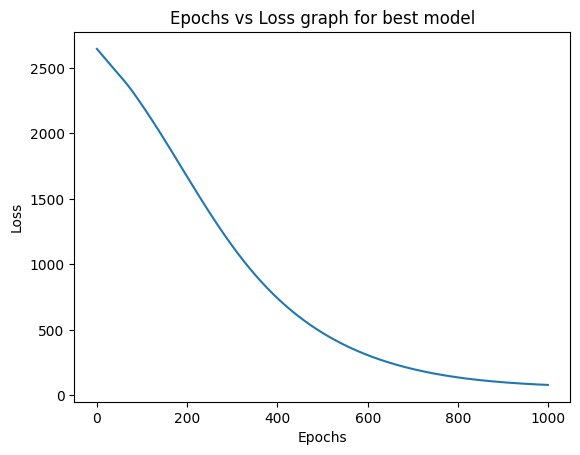

Training Losses for hidden layer 8
             0
0  2592.426758
1  2591.312012
2  2590.195068
3  2589.061035
4  2587.915283
 RMSE for validation set is : 42.079362275255406
 RMSE for test set is : 41.86587907896701
Training Losses for hidden layer 16
             0
0  2665.394775
1  2663.869629
2  2662.362061
3  2660.853516
4  2659.336914
 RMSE for validation set is : 34.793977203093284
 RMSE for test set is : 34.57689997265154
Training Losses for hidden layer 32
             0
0  2626.114746
1  2623.604492
2  2621.114990
3  2618.645752
4  2616.184570
 RMSE for validation set is : 21.533791888918085
 RMSE for test set is : 21.306523802417153
Training Losses for hidden layer 64
             0
0  2681.463379
1  2677.272949
2  2673.093994
3  2668.891602
4  2664.692627
 RMSE for validation set is : 9.077696798340297
 RMSE for test set is : 8.867635760971343


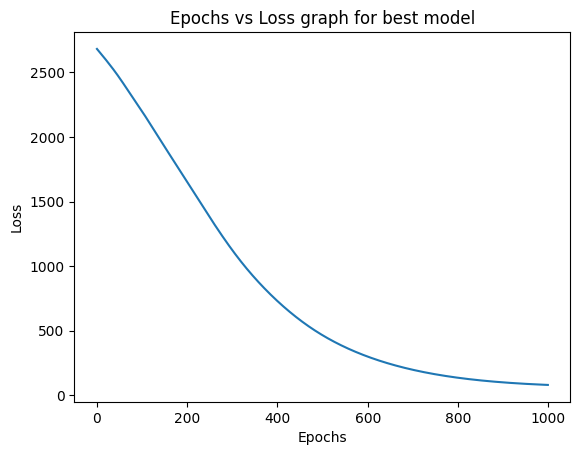

Training Losses for hidden layer 8
             0
0  2640.431641
1  2639.041260
2  2637.675781
3  2636.354736
4  2635.045410
 RMSE for validation set is : 42.67925776028386
 RMSE for test set is : 42.46600058935015
Training Losses for hidden layer 16
             0
0  2648.911621
1  2646.927246
2  2644.953857
3  2643.005371
4  2641.060303
 RMSE for validation set is : 39.17035267035915
 RMSE for test set is : 38.955531664522624
Training Losses for hidden layer 32
             0
0  2644.856445
1  2641.653320
2  2638.492432
3  2635.348145
4  2632.209961
 RMSE for validation set is : 24.79257332135031
 RMSE for test set is : 24.568399667195077
Training Losses for hidden layer 64
             0
0  2625.101318
1  2619.742920
2  2614.423340
3  2609.110840
4  2603.800049
 RMSE for validation set is : 9.080453071885932
 RMSE for test set is : 8.870418601840333


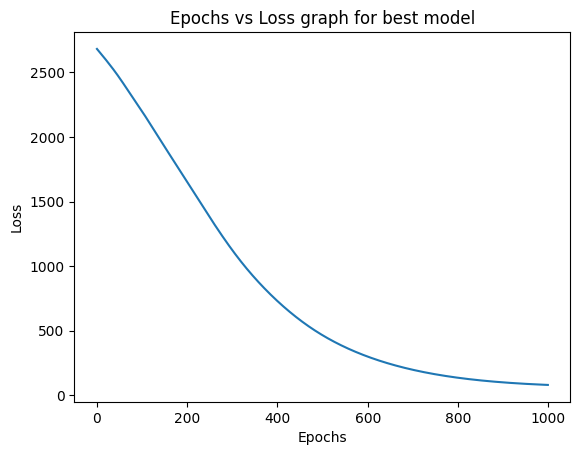

Training Losses for hidden layer 8
             0
0  2608.965820
1  2607.498047
2  2606.069092
3  2604.658691
4  2603.268555
 RMSE for validation set is : 44.71918266081752
 RMSE for test set is : 44.506732559962906
Training Losses for hidden layer 16
             0
0  2605.791260
1  2603.176270
2  2600.599121
3  2598.026367
4  2595.462646
 RMSE for validation set is : 36.79673069239219
 RMSE for test set is : 36.58072295611703
Training Losses for hidden layer 32
             0
0  2681.738281
1  2677.072021
2  2672.443359
3  2667.828613
4  2663.238770
 RMSE for validation set is : 30.212907228262456
 RMSE for test set is : 29.99292213869747
Training Losses for hidden layer 64
             0
0  2601.961914
1  2595.290771
2  2588.627930
3  2581.950195
4  2575.249268
 RMSE for validation set is : 11.742735869597212
 RMSE for test set is : 11.511421171289516


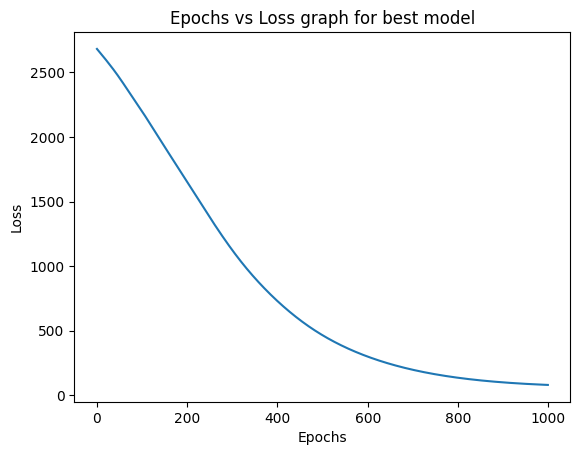

The Least Validation is 9.077696798340297 for Hidden Layer of Size 16 & 64


In [15]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for firstn in nuerons:
    for nueron in nuerons:
        model = DoubleLayer(hidden1=firstn, hidden2 = nueron)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        loss_arr = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            model.train()
            output = model(X_train)
            loss=criterion(y_train.float(), output)
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
        print(f"Training Losses for hidden layer {nueron}")
        loss_df = pd.DataFrame(loss_arr)
        print(loss_df.head())
        y_val_pred=model(X_val).detach().numpy()
        rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
        min_err = min(min_err,rmse)
        if rmse == min_err:
            again_loss = loss_arr
            best_sn = nueron
            best_fn = firstn
        y_test_pred = model(X_test).detach().numpy()
        rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
        print(f" RMSE for validation set is : {rmse}")
        print(f" RMSE for test set is : {rmse_2}")
    plt.plot(range(epochs), again_loss)
    plt.title('Epochs vs Loss graph for best model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn}")
 

In [17]:
class TripleLayer(nn.Module):
    def __init__(self, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(49, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
             0
0  2591.287109
1  2590.458496
2  2589.629883
3  2588.802734
4  2587.975098
 RMSE for validation set is : 42.50021110931024 for combination 8 & 8 & 8
 RMSE for test set is : 42.28687514549062 for combination 8 & 8 & 8
Training Losses for hidden layer 16
             0
0  2675.570312
1  2674.451172
2  2673.333252
3  2672.216064
4  2671.100830
 RMSE for validation set is : 34.496015677991714 for combination 8 & 8 & 16
 RMSE for test set is : 34.278748413170476 for combination 8 & 8 & 16
Training Losses for hidden layer 32
             0
0  2635.887207
1  2633.742432
2  2631.600586
3  2629.462891
4  2627.324219
 RMSE for validation set is : 20.798862514204128 for combination 8 & 8 & 32
 RMSE for test set is : 20.570886635075432 for combination 8 & 8 & 32
Training Losses for hidden layer 64
             0
0  2650.219727
1  2646.325195
2  2642.439941
3  2638.557861
4  2634.683105
 RMSE for validation set is : 8.973821502073362 for combination

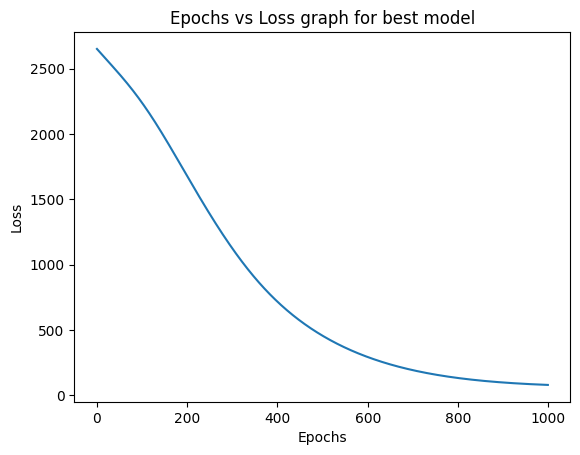

Training Losses for hidden layer 8
             0
0  2622.690918
1  2621.792236
2  2620.896240
3  2620.002441
4  2619.110596
 RMSE for validation set is : 44.259055725036376 for combination 8 & 16 & 8
 RMSE for test set is : 44.04643296381601 for combination 8 & 16 & 8
Training Losses for hidden layer 16
             0
0  2656.156982
1  2654.638916
2  2653.125977
3  2651.615479
4  2650.109375
 RMSE for validation set is : 35.10912640377054 for combination 8 & 16 & 16
 RMSE for test set is : 34.89220110916174 for combination 8 & 16 & 16
Training Losses for hidden layer 32
             0
0  2705.838379
1  2703.340332
2  2700.845215
3  2698.356201
4  2695.869385
 RMSE for validation set is : 21.558499968653607 for combination 8 & 16 & 32
 RMSE for test set is : 21.331296982533228 for combination 8 & 16 & 32
Training Losses for hidden layer 64
             0
0  2604.652588
1  2600.284912
2  2595.921387
3  2591.565918
4  2587.216797
 RMSE for validation set is : 9.017870221809712 for combin

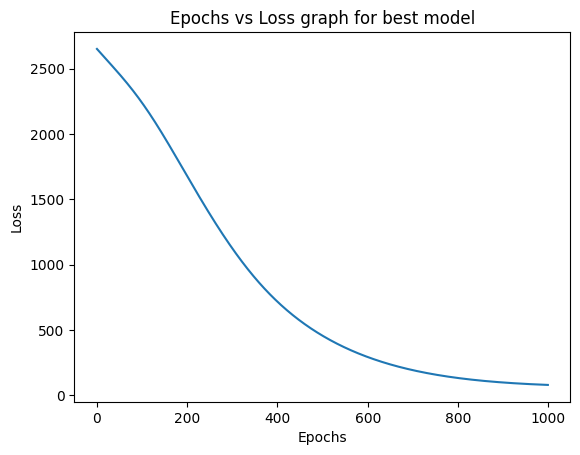

Training Losses for hidden layer 8
             0
0  2652.528076
1  2651.339600
2  2650.158691
3  2648.981934
4  2647.807617
 RMSE for validation set is : 45.75879888918906 for combination 8 & 32 & 8
 RMSE for test set is : 45.54674635487836 for combination 8 & 32 & 8
Training Losses for hidden layer 16
             0
0  2627.455078
1  2625.496826
2  2623.538574
3  2621.577393
4  2619.614990
 RMSE for validation set is : 36.640295174421695 for combination 8 & 32 & 16
 RMSE for test set is : 36.424207615137284 for combination 8 & 32 & 16
Training Losses for hidden layer 32
             0
0  2602.066895
1  2598.907227
2  2595.749756
3  2592.590088
4  2589.430176
 RMSE for validation set is : 22.0965054748306 for combination 8 & 32 & 32
 RMSE for test set is : 21.869816629193103 for combination 8 & 32 & 32
Training Losses for hidden layer 64
             0
0  2626.516357
1  2621.635010
2  2616.758301
3  2611.883301
4  2607.011230
 RMSE for validation set is : 9.151882340721933 for combina

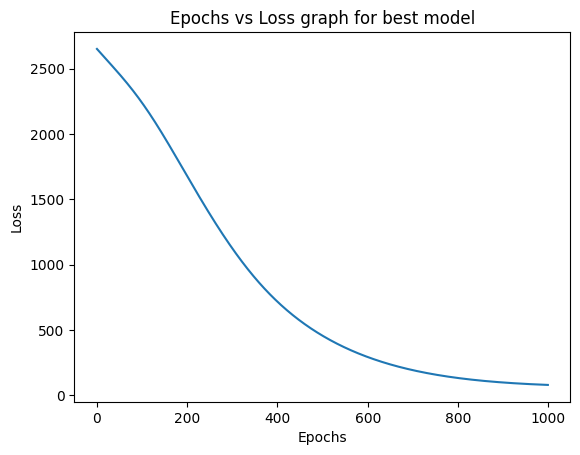

Training Losses for hidden layer 8
             0
0  2704.411621
1  2702.796387
2  2701.193115
3  2699.601074
4  2698.018799
 RMSE for validation set is : 46.539022499772976 for combination 8 & 64 & 8
 RMSE for test set is : 46.327250202533335 for combination 8 & 64 & 8
Training Losses for hidden layer 16
             0
0  2583.750244
1  2580.947998
2  2578.141357
3  2575.331787
4  2572.515625
 RMSE for validation set is : 36.26823860950429 for combination 8 & 64 & 16
 RMSE for test set is : 36.05195429103844 for combination 8 & 64 & 16
Training Losses for hidden layer 32
             0
0  2603.210693
1  2599.018066
2  2594.832031
3  2590.652344
4  2586.477051
 RMSE for validation set is : 25.213140494854688 for combination 8 & 64 & 32
 RMSE for test set is : 24.98928481307038 for combination 8 & 64 & 32
Training Losses for hidden layer 64
             0
0  2605.134033
1  2598.339355
2  2591.554932
3  2584.781738
4  2578.014648
 RMSE for validation set is : 10.32783173160597 for combin

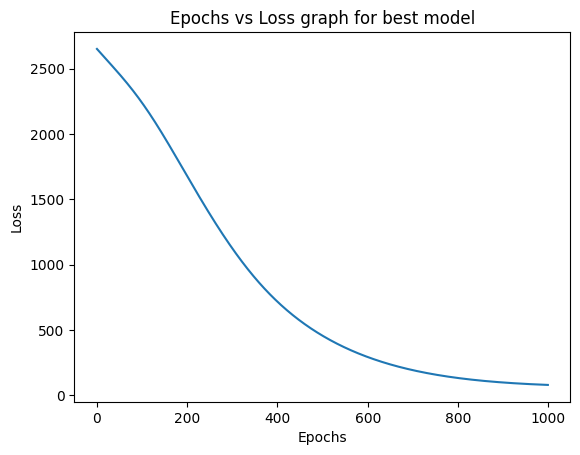

Training Losses for hidden layer 8
             0
0  2660.356445
1  2659.633545
2  2658.914062
3  2658.193359
4  2657.470215
 RMSE for validation set is : 42.57618688249483 for combination 16 & 8 & 8
 RMSE for test set is : 42.36288486012107 for combination 16 & 8 & 8
Training Losses for hidden layer 16
             0
0  2609.251221
1  2607.946289
2  2606.640625
3  2605.333008
4  2604.023438
 RMSE for validation set is : 33.75685151808537 for combination 16 & 8 & 16
 RMSE for test set is : 33.53914894147957 for combination 16 & 8 & 16
Training Losses for hidden layer 32
             0
0  2672.531006
1  2670.200928
2  2667.875244
3  2665.551758
4  2663.226318
 RMSE for validation set is : 21.3360555024657 for combination 16 & 8 & 32
 RMSE for test set is : 21.108622505786514 for combination 16 & 8 & 32
Training Losses for hidden layer 64
             0
0  2682.351318
1  2678.538086
2  2674.731445
3  2670.930908
4  2667.133545
 RMSE for validation set is : 8.961689259824201 for combinati

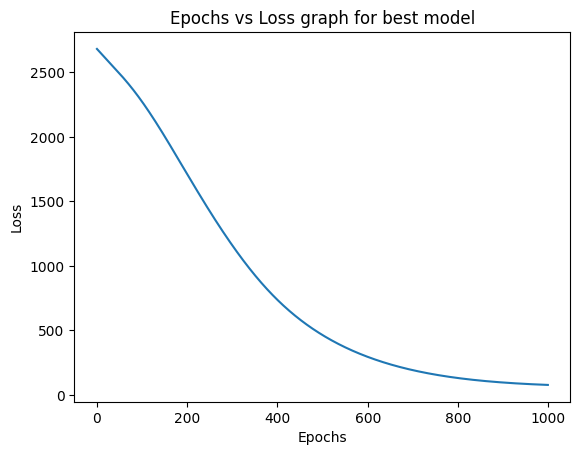

Training Losses for hidden layer 8
             0
0  2728.856934
1  2727.872559
2  2726.902588
3  2725.940430
4  2724.985107
 RMSE for validation set is : 45.50973238975923 for combination 16 & 16 & 8
 RMSE for test set is : 45.29758375178526 for combination 16 & 16 & 8
Training Losses for hidden layer 16
             0
0  2603.579346
1  2602.345947
2  2601.112549
3  2599.876953
4  2598.639404
 RMSE for validation set is : 33.928904082309565 for combination 16 & 16 & 16
 RMSE for test set is : 33.71130413329018 for combination 16 & 16 & 16
Training Losses for hidden layer 32
             0
0  2583.817871
1  2581.323975
2  2578.828613
3  2576.330566
4  2573.829102
 RMSE for validation set is : 20.725028949344605 for combination 16 & 16 & 32
 RMSE for test set is : 20.497008314715483 for combination 16 & 16 & 32
Training Losses for hidden layer 64
             0
0  2673.613281
1  2669.227295
2  2664.856934
3  2660.492920
4  2656.137939
 RMSE for validation set is : 9.06354300975333 for c

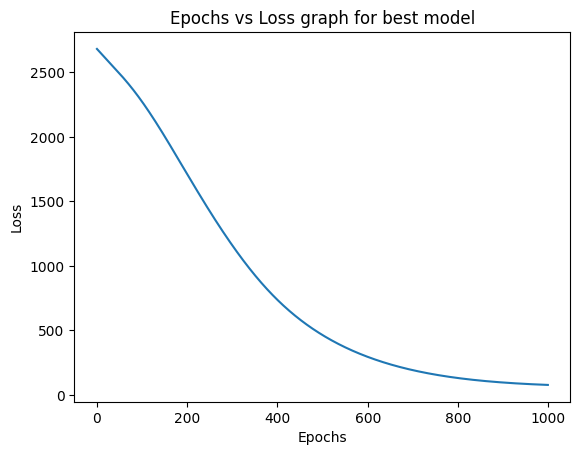

Training Losses for hidden layer 8
             0
0  2578.290039
1  2577.186035
2  2576.075439
3  2574.959717
4  2573.837646
 RMSE for validation set is : 42.274490752218114 for combination 16 & 32 & 8
 RMSE for test set is : 42.061061976254386 for combination 16 & 32 & 8
Training Losses for hidden layer 16
             0
0  2670.158691
1  2668.357666
2  2666.561279
3  2664.766357
4  2662.974121
 RMSE for validation set is : 37.84669328201359 for combination 16 & 32 & 16
 RMSE for test set is : 37.63122709837785 for combination 16 & 32 & 16
Training Losses for hidden layer 32
             0
0  2646.683105
1  2643.757080
2  2640.840576
3  2637.931641
4  2635.030518
 RMSE for validation set is : 22.92513397077812 for combination 16 & 32 & 32
 RMSE for test set is : 22.699229169353142 for combination 16 & 32 & 32
Training Losses for hidden layer 64
             0
0  2683.511719
1  2678.252686
2  2673.012939
3  2667.788574
4  2662.578125
 RMSE for validation set is : 9.380310588973344 for 

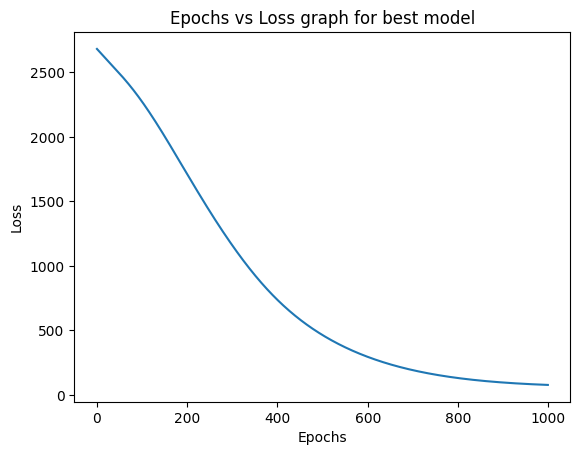

Training Losses for hidden layer 8
             0
0  2599.559082
1  2597.551270
2  2595.543701
3  2593.539551
4  2591.535889
 RMSE for validation set is : 45.229556360356746 for combination 16 & 64 & 8
 RMSE for test set is : 45.01730488665234 for combination 16 & 64 & 8
Training Losses for hidden layer 16
             0
0  2679.584229
1  2676.814453
2  2674.061279
3  2671.323242
4  2668.600098
 RMSE for validation set is : 40.680192376116075 for combination 16 & 64 & 16
 RMSE for test set is : 40.46606983161557 for combination 16 & 64 & 16
Training Losses for hidden layer 32
             0
0  2637.426025
1  2633.351807
2  2629.276611
3  2625.199951
4  2621.120117
 RMSE for validation set is : 26.009222889063192 for combination 16 & 64 & 32
 RMSE for test set is : 25.786042404955364 for combination 16 & 64 & 32
Training Losses for hidden layer 64
             0
0  2581.059326
1  2574.590088
2  2568.108643
3  2561.610596
4  2555.094971
 RMSE for validation set is : 10.250666899036375 fo

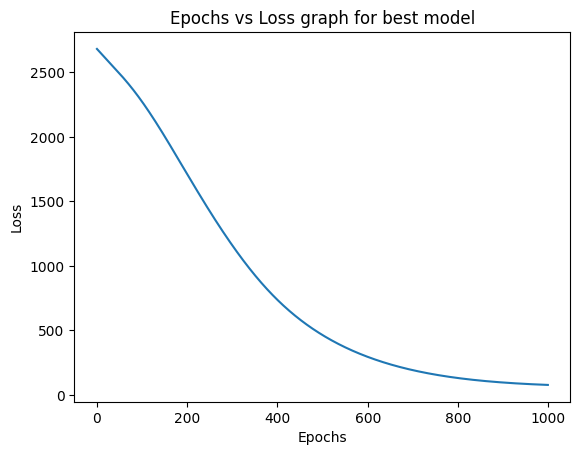

Training Losses for hidden layer 8
             0
0  2647.192871
1  2646.368896
2  2645.548584
3  2644.729492
4  2643.912598
 RMSE for validation set is : 42.093303403347306 for combination 32 & 8 & 8
 RMSE for test set is : 41.87979654198952 for combination 32 & 8 & 8
Training Losses for hidden layer 16
             0
0  2660.427734
1  2659.165039
2  2657.904541
3  2656.644043
4  2655.384521
 RMSE for validation set is : 34.54559586053445 for combination 32 & 8 & 16
 RMSE for test set is : 34.328356138275105 for combination 32 & 8 & 16
Training Losses for hidden layer 32
             0
0  2646.606934
1  2644.468750
2  2642.333252
3  2640.199219
4  2638.064209
 RMSE for validation set is : 21.095457830169345 for combination 32 & 8 & 32
 RMSE for test set is : 20.867800995989086 for combination 32 & 8 & 32
Training Losses for hidden layer 64
             0
0  2635.446045
1  2631.487793
2  2627.541748
3  2623.604248
4  2619.676025
 RMSE for validation set is : 8.970240665128893 for combi

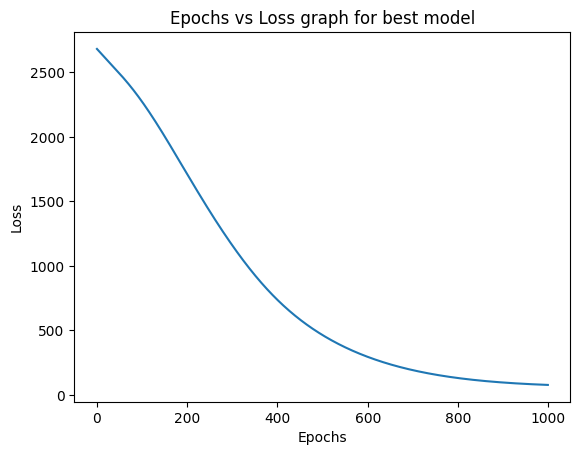

Training Losses for hidden layer 8
             0
0  2650.092285
1  2648.946777
2  2647.810303
3  2646.676025
4  2645.546875
 RMSE for validation set is : 44.66445947763935 for combination 32 & 16 & 8
 RMSE for test set is : 44.451990868660765 for combination 32 & 16 & 8
Training Losses for hidden layer 16
             0
0  2588.863770
1  2587.507568
2  2586.152832
3  2584.794678
4  2583.436279
 RMSE for validation set is : 33.757247485725195 for combination 32 & 16 & 16
 RMSE for test set is : 33.539545659517735 for combination 32 & 16 & 16
Training Losses for hidden layer 32
             0
0  2636.845947
1  2634.388184
2  2631.930176
3  2629.467285
4  2627.002441
 RMSE for validation set is : 21.712534941456845 for combination 32 & 16 & 32
 RMSE for test set is : 21.48547653426139 for combination 32 & 16 & 32
Training Losses for hidden layer 64
             0
0  2646.519531
1  2642.009277
2  2637.513916
3  2633.031250
4  2628.560059
 RMSE for validation set is : 9.068703258138932 for

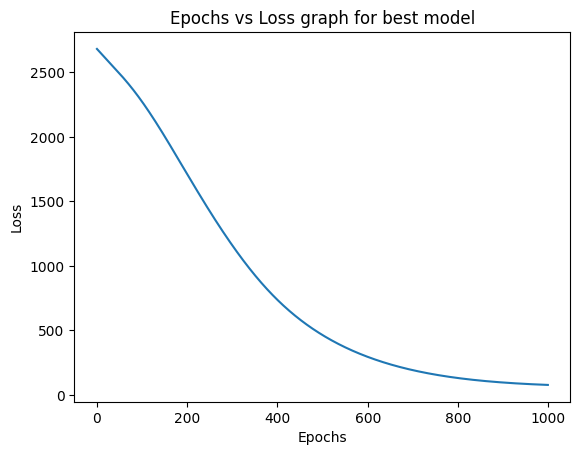

Training Losses for hidden layer 8
             0
0  2687.434082
1  2685.908691
2  2684.391113
3  2682.875732
4  2681.364258
 RMSE for validation set is : 45.51384147295194 for combination 32 & 32 & 8
 RMSE for test set is : 45.30169321563075 for combination 32 & 32 & 8
Training Losses for hidden layer 16
             0
0  2656.010254
1  2654.124756
2  2652.254883
3  2650.394043
4  2648.542725
 RMSE for validation set is : 39.502926488703025 for combination 32 & 32 & 16
 RMSE for test set is : 39.28826477491005 for combination 32 & 32 & 16
Training Losses for hidden layer 32
             0
0  2643.812256
1  2640.782959
2  2637.761719
3  2634.746582
4  2631.737061
 RMSE for validation set is : 23.058130196615302 for combination 32 & 32 & 32
 RMSE for test set is : 22.83234902740791 for combination 32 & 32 & 32
Training Losses for hidden layer 64
             0
0  2656.270264
1  2650.870605
2  2645.478760
3  2640.087891
4  2634.702637
 RMSE for validation set is : 9.411148570032596 for c

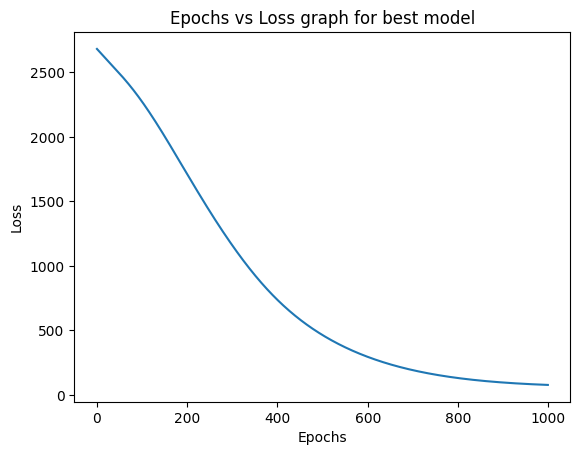

Training Losses for hidden layer 8
             0
0  2630.868652
1  2628.799561
2  2626.732178
3  2624.669189
4  2622.607666
 RMSE for validation set is : 45.6895038462747 for combination 32 & 64 & 8
 RMSE for test set is : 45.47742077978093 for combination 32 & 64 & 8
Training Losses for hidden layer 16
             0
0  2616.928711
1  2614.030762
2  2611.143311
3  2608.269287
4  2605.404297
 RMSE for validation set is : 38.62986038392127 for combination 32 & 64 & 16
 RMSE for test set is : 38.41478304820457 for combination 32 & 64 & 16
Training Losses for hidden layer 32
             0
0  2663.647949
1  2659.341797
2  2655.051514
3  2650.772705
4  2646.507568
 RMSE for validation set is : 28.83881174716256 for combination 32 & 64 & 32
 RMSE for test set is : 28.617847598515773 for combination 32 & 64 & 32
Training Losses for hidden layer 64
             0
0  2684.035400
1  2676.820068
2  2669.621582
3  2662.444336
4  2655.286621
 RMSE for validation set is : 13.684116171693027 for co

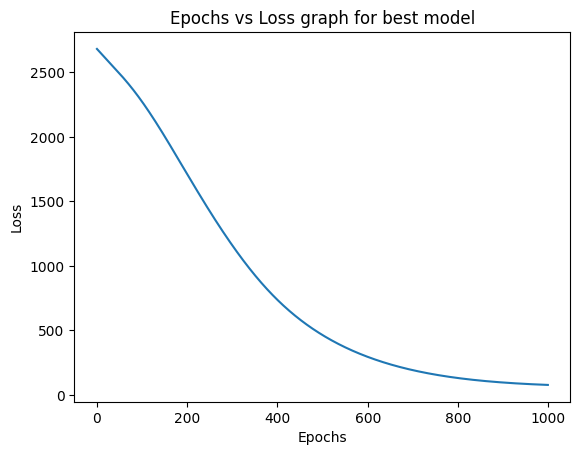

Training Losses for hidden layer 8
             0
0  2676.395752
1  2675.591064
2  2674.791748
3  2673.996582
4  2673.204102
 RMSE for validation set is : 42.09155612090966 for combination 64 & 8 & 8
 RMSE for test set is : 41.87804909608075 for combination 64 & 8 & 8
Training Losses for hidden layer 16
             0
0  2632.989258
1  2631.673340
2  2630.364014
3  2629.059082
4  2627.758057
 RMSE for validation set is : 33.5996688099842 for combination 64 & 8 & 16
 RMSE for test set is : 33.381871805433185 for combination 64 & 8 & 16
Training Losses for hidden layer 32
             0
0  2673.561279
1  2671.132080
2  2668.711426
3  2666.295166
4  2663.885742
 RMSE for validation set is : 21.464035827038096 for combination 64 & 8 & 32
 RMSE for test set is : 21.236737589316775 for combination 64 & 8 & 32
Training Losses for hidden layer 64
             0
0  2667.726562
1  2663.486572
2  2659.256592
3  2655.031982
4  2650.816895
 RMSE for validation set is : 9.072118245910017 for combina

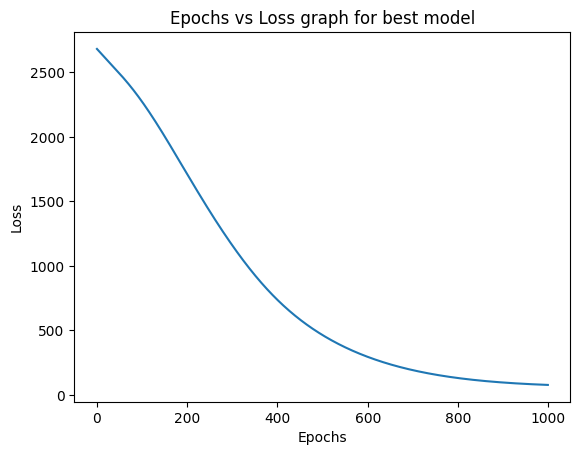

Training Losses for hidden layer 8
             0
0  2663.508301
1  2662.519043
2  2661.532715
3  2660.547363
4  2659.567383
 RMSE for validation set is : 43.998625300346745 for combination 64 & 16 & 8
 RMSE for test set is : 43.78589905500043 for combination 64 & 16 & 8
Training Losses for hidden layer 16
             0
0  2683.414551
1  2681.610352
2  2679.809814
3  2678.010986
4  2676.211182
 RMSE for validation set is : 36.93709185741093 for combination 64 & 16 & 16
 RMSE for test set is : 36.72116016026216 for combination 64 & 16 & 16
Training Losses for hidden layer 32
             0
0  2604.750732
1  2602.286621
2  2599.825439
3  2597.365479
4  2594.906006
 RMSE for validation set is : 21.15943620994322 for combination 64 & 16 & 32
 RMSE for test set is : 20.931841731940732 for combination 64 & 16 & 32
Training Losses for hidden layer 64
             0
0  2611.633545
1  2607.135254
2  2602.637695
3  2598.142090
4  2593.641357
 RMSE for validation set is : 8.99658774221749 for co

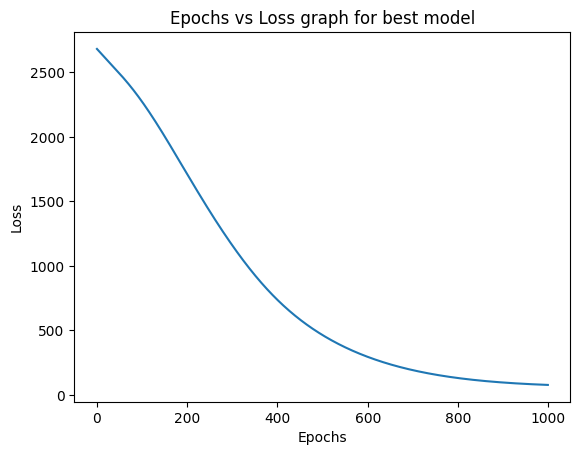

Training Losses for hidden layer 8
             0
0  2625.364746
1  2623.863525
2  2622.366455
3  2620.871338
4  2619.377441
 RMSE for validation set is : 44.453584960274156 for combination 64 & 32 & 8
 RMSE for test set is : 44.24103623457948 for combination 64 & 32 & 8
Training Losses for hidden layer 16
             0
0  2647.420898
1  2644.936035
2  2642.452881
3  2639.972900
4  2637.492676
 RMSE for validation set is : 38.937838581995024 for combination 64 & 32 & 16
 RMSE for test set is : 38.72290667003915 for combination 64 & 32 & 16
Training Losses for hidden layer 32
             0
0  2624.989990
1  2621.902100
2  2618.817383
3  2615.736084
4  2612.654053
 RMSE for validation set is : 23.268994519682867 for combination 64 & 32 & 32
 RMSE for test set is : 23.043406783533683 for combination 64 & 32 & 32
Training Losses for hidden layer 64
             0
0  2692.512939
1  2687.062012
2  2681.631348
3  2676.218018
4  2670.820557
 RMSE for validation set is : 9.189129950813063 for

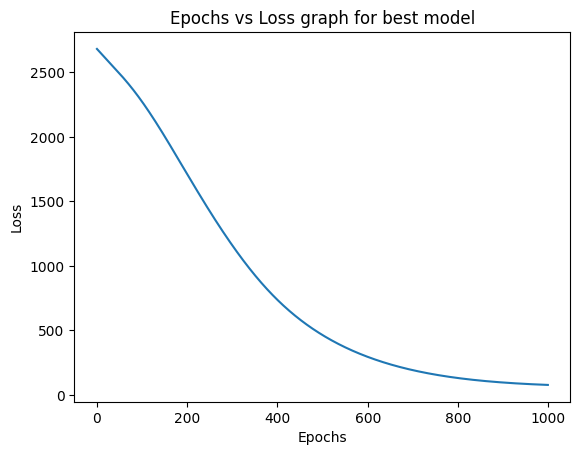

Training Losses for hidden layer 8
             0
0  2626.479248
1  2624.449707
2  2622.429443
3  2620.413574
4  2618.403564
 RMSE for validation set is : 45.77940215980736 for combination 64 & 64 & 8
 RMSE for test set is : 45.567354422464554 for combination 64 & 64 & 8
Training Losses for hidden layer 16
             0
0  2627.430908
1  2624.330322
2  2621.243896
3  2618.162842
4  2615.091309
 RMSE for validation set is : 39.723246082072336 for combination 64 & 64 & 16
 RMSE for test set is : 39.50868612465966 for combination 64 & 64 & 16
Training Losses for hidden layer 32
             0
0  2667.460205
1  2662.797607
2  2658.131592
3  2653.460449
4  2648.785400
 RMSE for validation set is : 30.25791840124767 for combination 64 & 64 & 32
 RMSE for test set is : 30.03796730773354 for combination 64 & 64 & 32
Training Losses for hidden layer 64
             0
0  2604.102051
1  2597.309570
2  2590.516113
3  2583.712891
4  2576.886230
 RMSE for validation set is : 11.776664185410803 for 

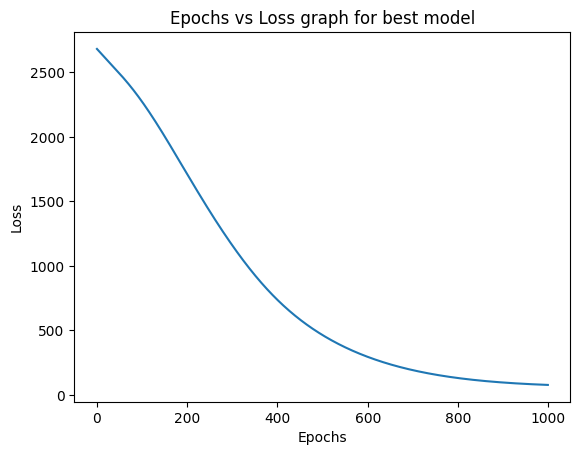

The Least Validation is 8.961689259824201 for Hidden Layer of Size 16 & 8 & 64


In [18]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
best_tn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for nueronF in nuerons:
    for firstn in nuerons:
        for nueron in nuerons:
            model = TripleLayer(hidden1=nueronF,hidden2=firstn, hidden3 = nueron)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            loss_arr = []
            for epoch in range(epochs):
                optimizer.zero_grad()
                model.train()
                output = model(X_train)
                loss=criterion(y_train.float(), output)
                loss_arr.append(loss.detach().numpy())
                loss.backward()
                optimizer.step()
            print(f"Training Losses for hidden layer {nueron}")
            loss_df = pd.DataFrame(loss_arr)
            print(loss_df.head())
            y_val_pred=model(X_val).detach().numpy()
            rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
            min_err = min(min_err,rmse)
            if rmse == min_err:
                again_loss = loss_arr
                best_sn = firstn
                best_fn = nueronF
                best_tn = nueron
            y_test_pred = model(X_test).detach().numpy()
            rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
            print(f" RMSE for validation set is : {rmse} for combination {nueronF} & {firstn} & {nueron}")
            print(f" RMSE for test set is : {rmse_2} for combination {nueronF} & {firstn} & {nueron}")
        plt.plot(range(epochs), again_loss)
        plt.title('Epochs vs Loss graph for best model')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn} & {best_tn}")
 

In [19]:
model = SingleLayer(hidden1=256)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


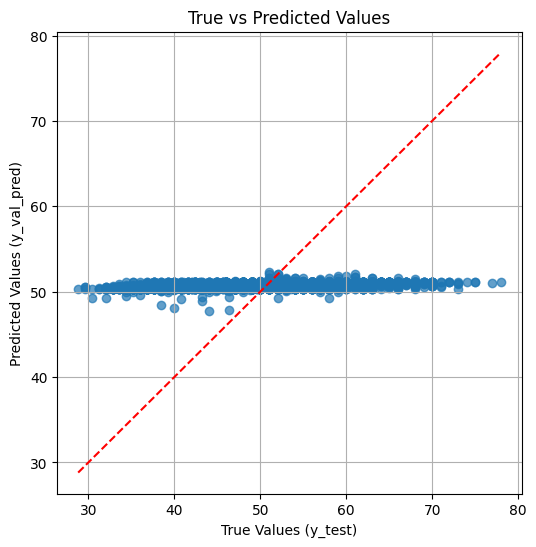

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [21]:
model = DoubleLayer(hidden1=16,hidden2 = 64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


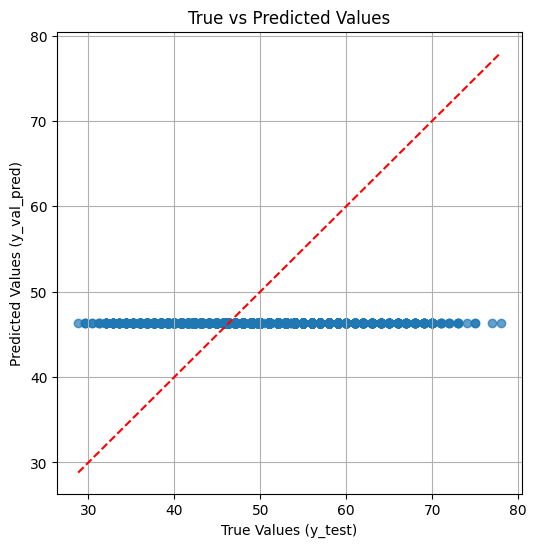

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [23]:
model = TripleLayer(hidden1=16,hidden2 = 8, hidden3=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


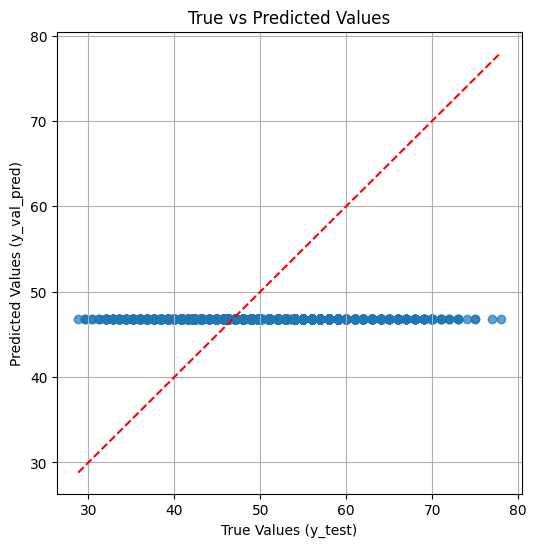

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()